In [1]:
import numpy as np # linear algebra
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly as plotly
import seaborn as sns
%matplotlib inline
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
listings_df = pd.read_csv('./data/listings_cleaned_amsterdam.csv')
len(listings_df)

18780

In [3]:
sentfeatures_df = pd.read_csv('./data/amsterdam_sentiment_features.csv')
len(sentfeatures_df)

16143

In [4]:
result = sentfeatures_df.merge(listings_df, how="inner", left_on=['listing_id'],right_on=['id'])
result

,listing_id,avg_sentiment_score,proportion_positive,id,name,description,neighborhood_overview,host_since,host_about,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,0.898851,0.982979,2818,13495,11233,1,0,7528,1,...,10.0,10.0,10.0,9.0,10.0,1,0,1,0,1.98
1,20168,0.783318,0.932862,20168,15916,275,4,10,87,1,...,10.0,10.0,10.0,10.0,9.0,2,0,2,0,2.63
2,25428,0.939460,1.000000,25428,10121,7698,0,7,7957,3,...,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.15
3,27886,0.909413,0.983240,27886,13892,12531,0,19,6452,1,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,2.05
4,28871,0.867427,0.988095,28871,5029,609,1,25,2095,4,...,10.0,10.0,10.0,10.0,10.0,2,0,2,0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16136,45429265,-0.778300,0.000000,45429265,8878,2148,0,3110,8748,4,...,4.0,4.0,4.0,8.0,2.0,7,5,2,0,1.00
16137,45463326,0.865800,1.000000,45463326,13119,12799,0,3226,8748,4,...,9.0,9.0,9.0,9.0,10.0,5,0,5,0,3.00
16138,45463772,0.571900,1.000000,45463772,4446,3643,0,3226,8748,4,...,10.0,10.0,10.0,10.0,10.0,1,1,0,0,1.00
16139,45525740,0.475400,1.000000,45525740,7572,13700,0,3225,8748,4,...,10.0,10.0,10.0,8.0,8.0,3,0,3,0,1.00


In [5]:
result.dtypes

listing_id                                        int64
avg_sentiment_score                             float64
proportion_positive                             float64
id                                                int64
name                                              int64
description                                       int64
neighborhood_overview                             int64
host_since                                        int64
host_about                                        int64
host_response_time                                int64
host_response_rate                                int64
host_acceptance_rate                              int64
host_neighbourhood                                int64
host_listings_count                             float64
host_total_listings_count                       float64
host_identity_verified                            int64
neighborhood                                      int64
neighborhood_group                              

In [6]:
result=result.dropna()

In [7]:
X = result.drop(['price'],axis = 1)
y = result['price']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
#gradient boost for predicting score
from sklearn.ensemble import GradientBoostingRegressor



In [10]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)
predictions = GBoost.predict(X_test)

In [11]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 44.350214920316496
MSE: 7510.77580333517
RMSE: 86.66473217713865


In [12]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,80.0,74.543949
1,195.0,212.093034
2,35.0,32.445236
3,94.0,151.762784
4,95.0,139.293354
5,89.0,138.181050
6,183.0,98.241807
7,195.0,129.986265
8,98.0,99.930324
9,47.0,80.766131


In [32]:
import plotly.graph_objs as go
import plotly.express as px
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Amsterdam - Gradient boosting price predictions", yaxis = dict(title ="Price"), xaxis =dict(title="Index"))
fig.show()

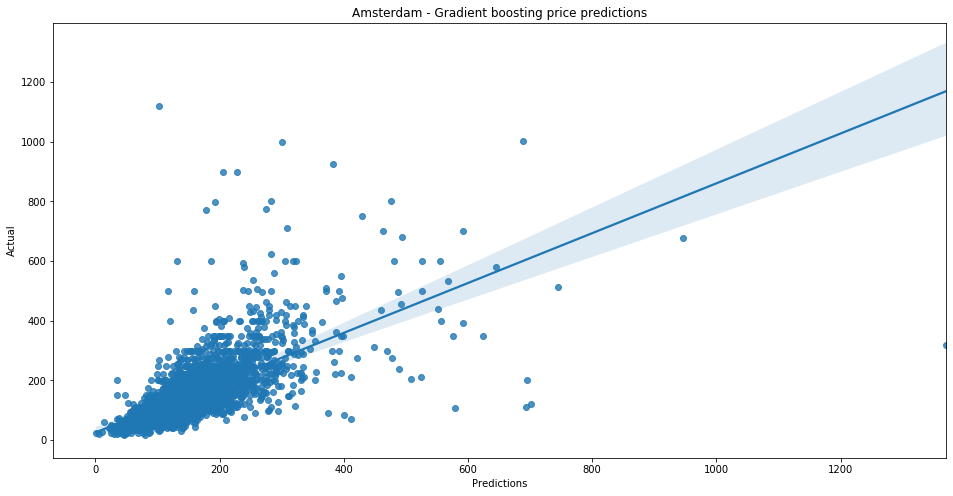

In [31]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Amsterdam - Gradient boosting price predictions")
plt.show()

In [15]:
# xgboost price predictions for amsterdam
import xgboost
import warnings 
warnings.simplefilter(action='ignore')

In [16]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')

In [17]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 42.8212649254356
MSE: 5755.646405049404
RMSE: 75.86597659721652


In [18]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Amsterdam - XGBoost price predictions", yaxis = dict(title ="Price"), xaxis =dict(title="Index"))
fig.show()

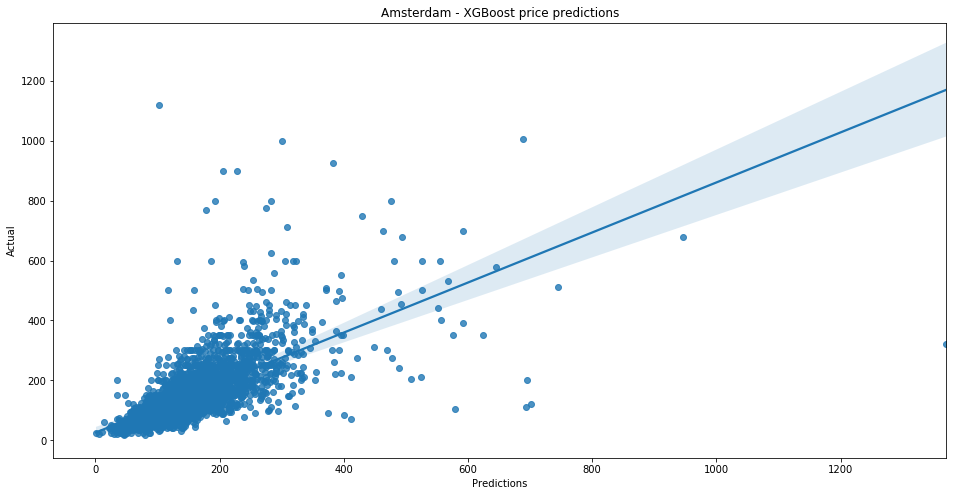

In [19]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Amsterdam - XGBoost price predictions")
plt.show()

In [20]:
#gboost rating predictions
X = result.drop(['review_scores_rating'],axis = 1)
y = result['review_scores_rating']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train_r,y_train_r)
predictions_r = GBoost.predict(X_test_r)

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test_r, predictions_r))
print('MSE:', metrics.mean_squared_error(y_test_r, predictions_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, predictions_r)))

MAE: 2.1050701563042806
MSE: 11.248524464151485
RMSE: 3.353881999139428


In [23]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': predictions_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,92.0,86.808030
1,96.0,96.721826
2,96.0,93.861231
3,93.0,96.418051
4,97.0,96.703563
5,87.0,91.706883
6,88.0,89.359552
7,98.0,97.275965
8,93.0,94.521573
9,98.0,97.983024


In [34]:

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Amsterdam - Gradient boosting rating predictions", yaxis = dict(title ="Rating"), xaxis =dict(title="Index"))
fig.show()

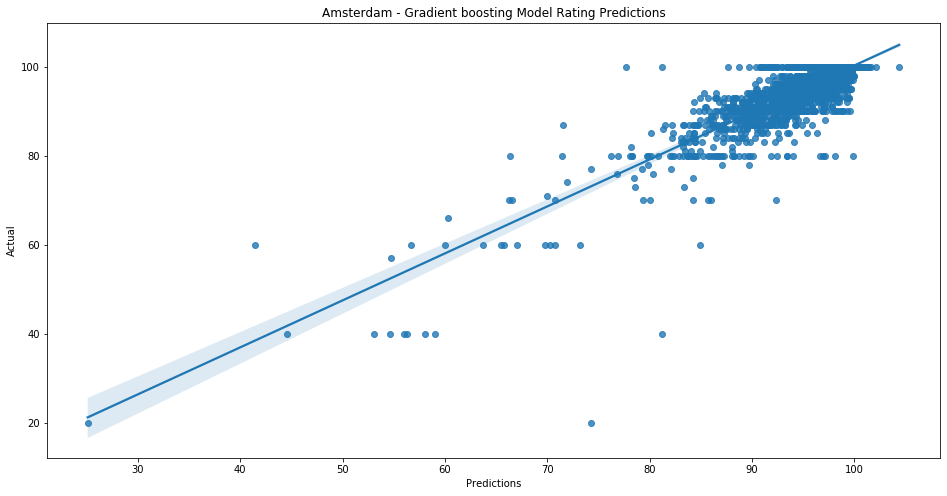

In [30]:
plt.figure(figsize=(16,8))
sns.regplot(predictions_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Amsterdam - Gradient boosting Model Rating Predictions")
plt.show()

In [26]:
#xgboost rating predictions
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train_r,y_train_r)
ypred_r = xgb.predict(X_test_r)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test_r, ypred_r))
print('MSE:', metrics.mean_squared_error(y_test_r, ypred_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, ypred_r)))

MAE: 2.11788274928793
MSE: 11.274382612682967
RMSE: 3.357734744240969


In [35]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': predictions_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Amsterdam - XGBoost rating predictions", yaxis = dict(title ="Rating"), xaxis =dict(title="Index"))
fig.show()

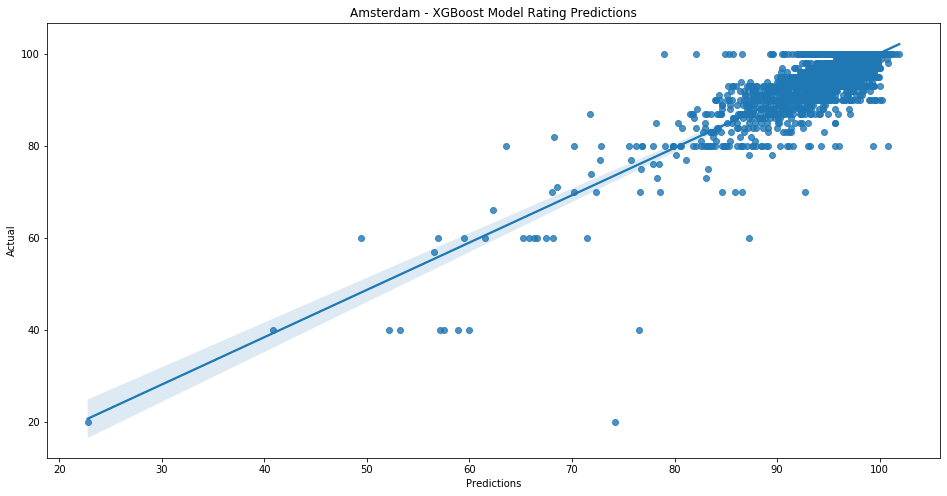

In [33]:
plt.figure(figsize=(16,8))
sns.regplot(ypred_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Amsterdam - XGBoost Model Rating Predictions")
plt.show()